In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

def plot_results(axes, results_df, dataset, learner):
    
    axes.scatter(results_df["prediction_score"],
                 results_df["assay_score"], color=np.random.rand(3,))
    axes.set_title(f'{dataset}/{learner}', fontsize=16)
    axes.set_ylabel('Assay Value', fontsize=14)
    axes.set_xlabel('Prediction', fontsize=14)


In [3]:
datasets = [
    "ADRB2",
    "AICDA",
    "BRCA1",
    "BRCA2",
    "CALM1",
    "CAR11",
    "CASP3",
    "CASP7",
    "CBS",
    "GDIA",
    "GRB2",
    "HEM3",
    "HMDH",
    "HXK4",
    "KCNE1",
    "KCNH2",
    "MET",
    "MK01",
    "MSH2",
    "MTHR",
    "NPC1",
    "OTC",
    "P53",
    "PAI1",
    "PPARG",
    "PPM1D",
    "PTEN",
    "RAF1",
    "RASH",
    "S22A1",
    "SC6A4",
    "SCN5A",
    "SERC",
    "SHOC2",
    "SRC",
    "SUMO1",
    "SYUA",
    "TADBP",
    "TPK1",
    "TPOR",
    "UBC9",
    "VKOR1",
    "brenan",
    "cas12f",
    "cov2_S",
    "doud",
    "giacomelli",
    "haddox",
    "jones",
    "kelsic",
    "lee",
    "markin",
    "stiffler",
    "zikv_E"]


In [ ]:
import os

import context  # noqa: F401
from msalde.container import ALDEContainer

datasets = ["cas12f2"]
container = ALDEContainer("./config/msaldem.yaml")
repo = container.query_repository
cols = 2

num_rows = (len(datasets) * cols) // cols + (len(datasets) % cols > 0)
fig, axes = plt.subplots(num_rows, cols, figsize=(15, 8))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    llr_results = repo.get_top_variants_by_dataset_learner(
        dataset_name=dataset, learner_name="ESM2_LLR")
    ind = i
    # ind += 1
    plot_results(axes[ind], llr_results, dataset, "LogLikelihood")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


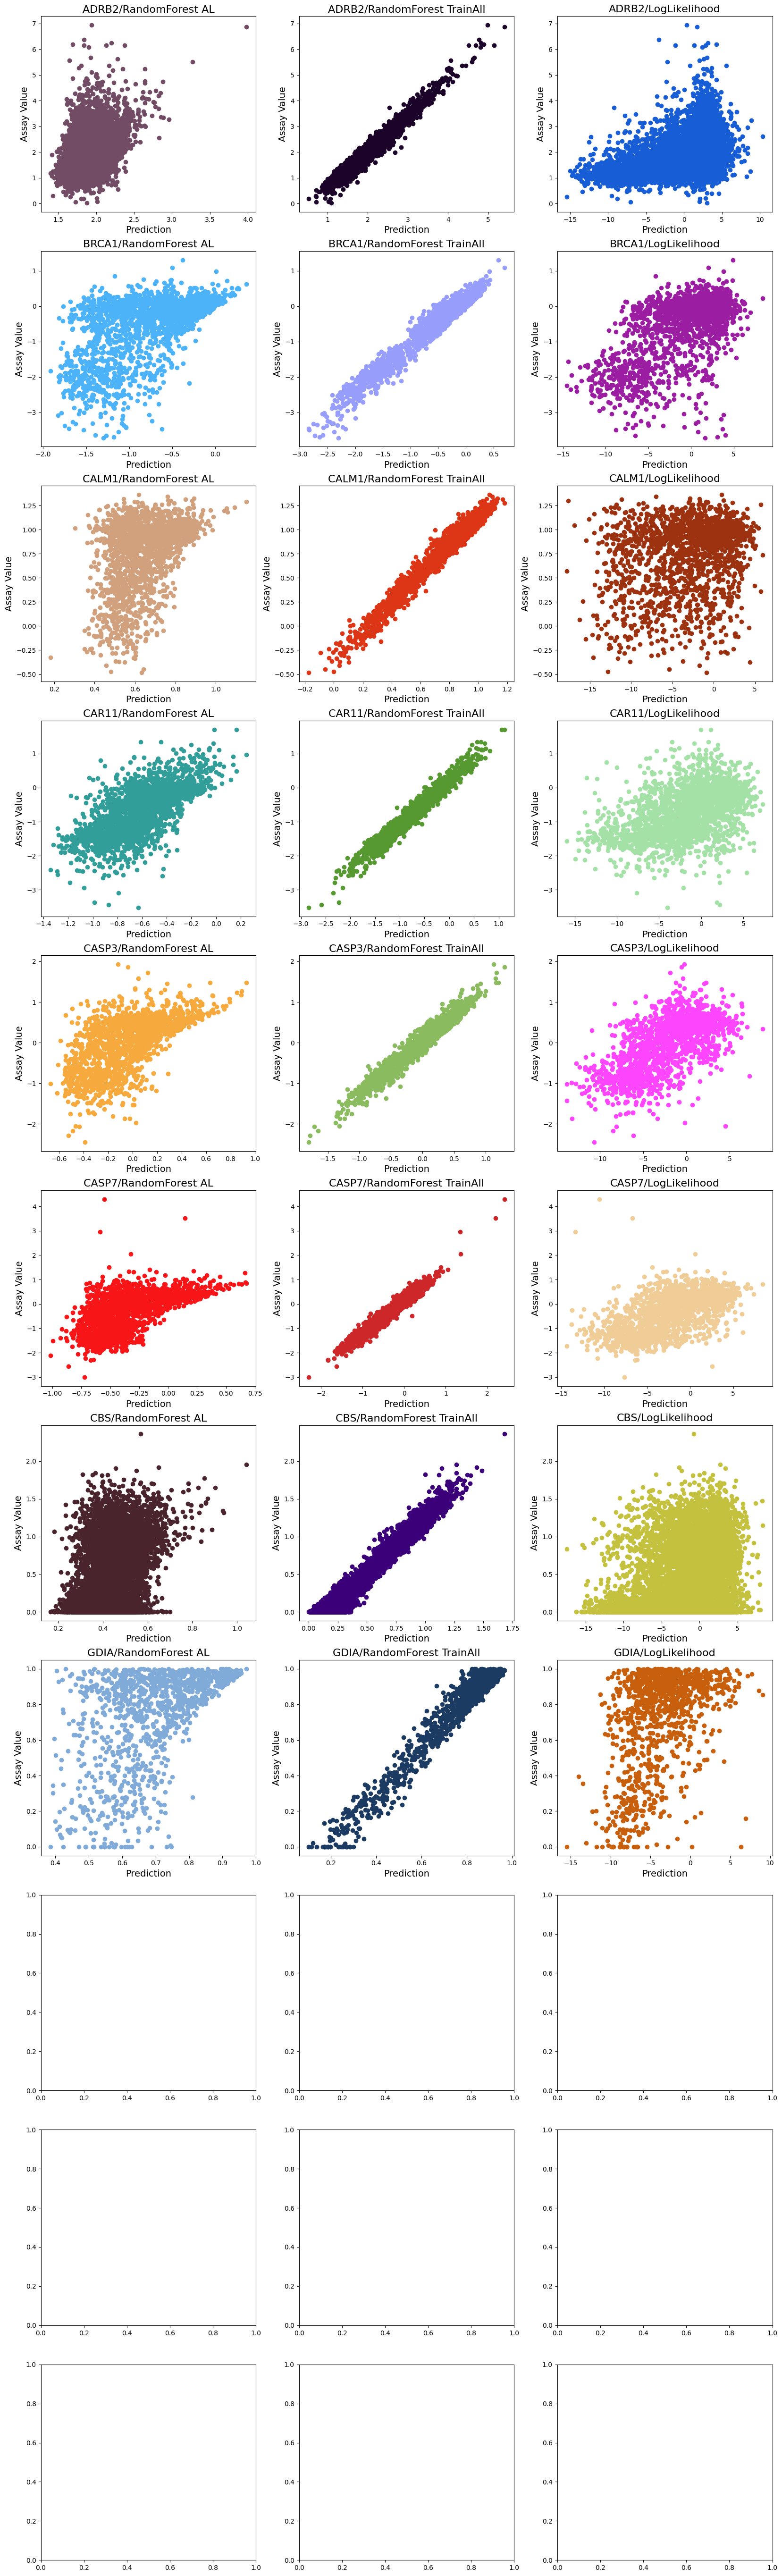

In [ ]:
import context  # noqa: F401
from msalde.container import ALDEContainer

# datasets = ["cas12f2"]
container = ALDEContainer("./config/msaldem.yaml")
repo = container.query_repository

datasets_ = datasets[:20]

num_rows = (len(datasets_) * 3) // 3 + (len(datasets_) % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 7*len(datasets_)))
axes = axes.flatten()
ind = 0
for dataset in datasets_:
    results = repo.get_top_variants_by_dataset_learner(
        dataset_name=dataset, learner_name="RF_AL")
    if len(results) == 0:
        continue
    plot_results(axes[ind], results, dataset, "RandomForest AL")
    ind += 1
    results = repo.get_top_variants_by_dataset_learner(
        dataset_name=dataset, learner_name="RFTRAIN_ALL")
    plot_results(axes[ind], results, dataset, "RandomForest TrainAll")
    ind += 1
    results = repo.get_top_variants_by_dataset_learner(
        dataset_name=dataset, learner_name="ESM2_LLR")
    plot_results(axes[ind], results, dataset, "LogLikelihood")
    ind += 1

# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
